In [40]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.compose import make_column_transformer
import seaborn as sns

In [41]:
enc_stats = pd.read_csv('enc_stats.csv')
enc_stats = enc_stats.drop(['Unnamed: 0','Pts Won','Pts Max','Player'], axis=1)

#since we want to remove strong positive and negative correlations, we can use absolute values here
matrix = enc_stats.corr().abs()

#Create 2D boolean mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

reduced_matrix = matrix.mask(mask)

reduced_matrix.iloc[:5,:5]

#setting a threshhold to decide whether to keep or drop feature. for now let's use 0.8 and a list comprehension
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.8)]
to_drop

stats_reduced = enc_stats.drop(to_drop, axis = 1)

stats_reduced.columns

X, y = enc_stats.drop('Share', axis = 1), enc_stats['Share']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 729)

%%time
#init, fit, score
forest = RandomForestRegressor()
_ = forest.fit(X_train, y_train)

print(f"Training score: {forest.score(X_train, y_train)}")

print(f"Test score: {forest.score(X_test,y_test)}")

In [42]:
X = enc_stats.drop(['Share'], axis = 1)
Y = enc_stats['Share']

In [43]:
regressor = RandomForestRegressor()
feature_selector = RFECV(regressor)

In [44]:
fit = feature_selector.fit(X, y)

In [45]:
fit.support_

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [52]:
fit.ranking_


array([ 9,  6, 10,  7,  8,  1,  1,  1,  1,  1,  1,  1,  5,  4,  1,  1,  3,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

In [56]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

Optimal number of features: 30


In [66]:
X_new = X.loc[:,feature_selector.get_support()]

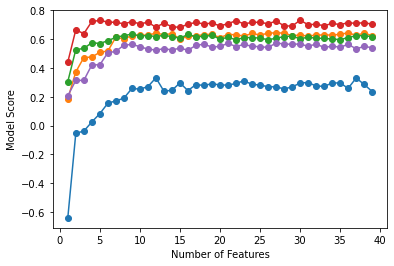

In [68]:
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.show()